# Reconstruction.  Part I : Camera Calibration (Zhang)

## Brief overview

* Calibration of camera using Zhang's calibration method, implemented in OpenCV

## Requirements

* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* NumPy, SciPy, y Matplotlib.
* OpenCV.

## Additional material needed:
* Two sequences of images taken from a pair of cameras (left and right) ein directories ``left`` and ``right``.

## 1. Camera calibration

En esta parte se trabajará con la secuencia de imágenes del directorio ``left``. Esta secuencia contiene una serie de imágenes de la plantilla de calibración. Para la calibración se debe tener en cuenta que el tamaño de cada escaque de la plantilla es de 30 mm en las direcciones X e Y.

In [1]:
# uncomment to show results in a window
# %matplotlib tk
import cv2
import glob
import copy
import numpy as np
import scipy.misc as scpm
import matplotlib.pyplot as plt

Implementa la función ``load_images(filenames)`` que reciba una lista de nombres de archivos de imagen
y las cargue como matrices de NumPy. Usa la función ``scipy.misc.imread`` para cargar las imágenes. La función
debe devolver una lista de matrices de NumPy con las imágenes leídas.

In [2]:
def load_images(filenames):
    images = np.asarray([scpm.imread(file) for file in filenames])
    return images

Usa ``load_images`` para cargar todas las imágenes del directorio ``left`` por orden alfabético (la función ``glob.glob`` permite generar la lista de nombres de archivo, y, por ejemplo, la función ``sorted()`` de Python ordena alfabéticamente una lista de cadenas de texto).

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


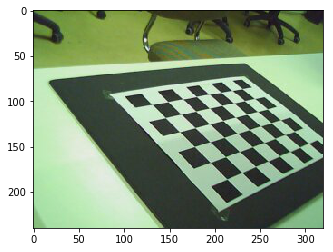

In [3]:
left_fl = sorted(glob.glob('left/*.jpg'))

left=load_images(left_fl)

plt.imshow(left[0])

In [4]:
print(left.shape)

(19, 240, 320, 3)


La función ``cv2.findChessboardCorners`` de
OpenCV busca la plantilla de calibración en una imagen y
devuelve una tupla de dos elementos. El primer elemento
es 0 si no consiguió detectar correctamente la plantilla, y
es 1 en caso contrario. El segundo elemento contiene las
coordenadas de las esquinas de la plantilla de calibración,
que sólo son válidas si la detección fue exitosa, es decir, si
el primer elemento de la tupla es 1.

**Ejercicio 1.** Usa la  función ``cv2.findChessboardCorners``, y opcionalmente ``cv2.cornerSubPix``, para detectar automáticamente el patrón de calibración y sus esquinas en todas las imágenes cargadas. El tamaño de la plantilla de calibración en las imágenes
de la práctica es (8, 6) , esto es, 8 filas y 6 columnas. Almacena los resultados de las múltiples llamadas en
una lista, de modo que el elemento i de dicha lista corresponda al resultado de ``cv2.findChessboardCorners``
para la imagen i cargada anteriormente.


In [5]:
corners = [cv2.findChessboardCorners(i,(8, 6),None) for i in left]

El siguiente ejercicio consiste en dibujar sobre las imágenes los puntos detectados por ``cv.FindChessboardCorners``. Por motivos de eficiencia, la función empleada para hacerlo modifica directamente las imagen pasadas por parámetro en lugar de hacer una copia. Para evitar perder las imágenes originales es mejor realizar una copia de las mismas con antelación. Una forma de hacerlo es ``imgs2 = copy.deepcopy(imgs)``
donde ``imgs`` es la lista de imágenes cargadas. Utiliza estas imágenes copiadas en lugar de las
originales en el siguiente ejercicio.

**Ejercicio 2.** Usa ``cv2.drawChessboardCorners`` para dibujar las esquinas detectadas en el ejercicio anterior. Aplícalo a todas las imágenes que fueron correctamente detectadas. Ignora el resto.
Muestra alguna de las imágenes resultantes.

In [7]:
imgs2 = copy.deepcopy(left)

imgs3= [cv2.drawChessboardCorners(imgs2[i], (8,6), corners[i][1], corners[i][0]) for i in range(len(imgs2)) if corners[i][0]==True] 

* **"imgs3"** contiene 18 imágenes en las que fueron encontradas las esquinas. Un ejemplo:

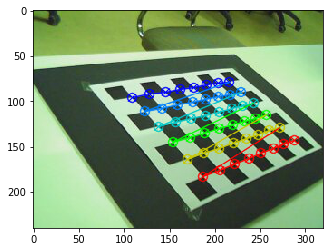

In [9]:
plt.imshow(imgs3[0])

Para calibrar la cámara, además de las coordenadas de
las esquinas en cada una de las imágenes, se necesitan las
coordenadas tridimensionales de las esquinas en el sistema
de referencia de la escena. Para esta práctica consideraremos que el centro del sistema de referencia, esto es, el
punto de coordenadas $[0, 0, 0]^\top$, es la primera esquina de
la plantilla de calibración detectada en todas las imágenes.
También consideraremos que el eje X corresponde al lado
corto de la plantilla de calibración, y el eje Y al lado largo.
Esta disposición implica que el eje Z apunta en la dirección
normal hacia arriba del plano de calibración.

Para el siguiente ejercicio es muy importante tener en
cuenta que las coordenadas de las esquinas en el sistema de
referencia de la escena deben darse en el mismo orden que
en el que fueron detectadas en cada una de las imágenes.

**Ejercicio 3.** Implementa la función ``get_chessboard_points(chessboard_shape, dx, dy)`` que genere una matriz de NumPy (es decir, un ndarray) de
tamaño $N × 3$ con las coordenadas $(x,y,z)$ de las esquinas de
la plantilla de calibración en el sistema de referencia de la
escena. $N$ es el número de esquinas de la plantilla.

``chessboard_shape`` es el número de puntos por filas
y por columnas de la plantilla de calibración. Al igual que
en el Ejercicio 1, debe ser (8, 6). ``dx`` (resp. ``dy``) es el ancho
(resp. alto) de un escaque de la plantilla de calibración.
Para la plantilla utilizada en esta práctica, ambos valores
son 30mm.

In [10]:
def get_chessboard_points(chessboard_shape, dx, dy):
    return np.array([[i*dx,j*dy,0] for i in range(0,chessboard_shape[1]) for j in range(0,chessboard_shape[0])])

cb_points = get_chessboard_points((8,6),30,30)
print(cb_points)

[[  0   0   0]
 [  0  30   0]
 [  0  60   0]
 [  0  90   0]
 [  0 120   0]
 [  0 150   0]
 [  0 180   0]
 [  0 210   0]
 [ 30   0   0]
 [ 30  30   0]
 [ 30  60   0]
 [ 30  90   0]
 [ 30 120   0]
 [ 30 150   0]
 [ 30 180   0]
 [ 30 210   0]
 [ 60   0   0]
 [ 60  30   0]
 [ 60  60   0]
 [ 60  90   0]
 [ 60 120   0]
 [ 60 150   0]
 [ 60 180   0]
 [ 60 210   0]
 [ 90   0   0]
 [ 90  30   0]
 [ 90  60   0]
 [ 90  90   0]
 [ 90 120   0]
 [ 90 150   0]
 [ 90 180   0]
 [ 90 210   0]
 [120   0   0]
 [120  30   0]
 [120  60   0]
 [120  90   0]
 [120 120   0]
 [120 150   0]
 [120 180   0]
 [120 210   0]
 [150   0   0]
 [150  30   0]
 [150  60   0]
 [150  90   0]
 [150 120   0]
 [150 150   0]
 [150 180   0]
 [150 210   0]]


**Ejercicio 4.** Calibra la cámara izquierda usando la lista de resultados de ``cv2.findChessboardCorners``
y el conjunto de puntos del modelo dados por ``get_chessboard_points``, del ejercicio anterior.

Para ello usa la función calibrate que se distribuye con el material de la práctica.
Guarda el resultado de la calibración, matriz de intrínsecos y matrices de extrínsecos, con el comando
np.savez(‘calib_left’, intrinsic=intrinsic, extrinsic=extrinsic)

In [11]:
# Extract the list of valid images with all corners
valid_corners =[corners[i][1] for i in range(1,len(imgs2)) if corners[i][1].shape[0]==48]
num_valid_images = len(valid_corners)
print(num_valid_images)
# Prepare input data 
# object_points: numpy array with dimensions (number_of_images, number_of_points, 3)
object_points = np.reshape(np.array(num_valid_images*np.ndarray.tolist(cb_points)),(18,48,3))
print(object_points.shape)
# image_points: numpy array with dimensions (number_of_images, number_of_points, 2)
image_points = np.squeeze(np.array(valid_corners))
print(image_points.shape)
# Calibrate for square pixels corners standard

object_points = object_points.astype('float32')
image_points = image_points.astype('float32')
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points,(240,320),None,None,flags=cv2.CALIB_FIX_ASPECT_RATIO)

print("Corners standard intrinsics:\n",intrinsics)
print("Corners standerd dist_coefs:", dist_coeffs)
print("rms:", rms)

18
(18, 48, 3)
(18, 48, 2)
Corners standard intrinsics:
 [[420.3286965    0.         148.65832337]
 [  0.         420.3286965  126.7988582 ]
 [  0.           0.           1.        ]]
Corners standerd dist_coefs: [[ 1.26026824e-02 -3.17423236e+00  5.18023413e-03 -6.66145495e-03
   1.89213129e+01]]
rms: 0.15268054982163726


###  1.2 Extrinsic parameters

In [12]:
listofextrinsics = []

for rvec, tvec in zip(rvecs,tvecs):
    ext = np.zeros((4,4))
    ext[0:3,0:3],jacobian = cv2.Rodrigues(rvec)
    ext[0:3,3:] = tvec
    ext[3,3]=1
    listofextrinsics.append(ext)
    
extrinsics=np.array(listofextrinsics)

print(extrinsics[1])

[[ 5.74348370e-01  7.39596311e-01  3.50886373e-01 -5.90559635e+01]
 [ 6.79748468e-01 -1.92044183e-01 -7.07856661e-01 -5.35121464e+01]
 [-4.56142488e-01  6.45070794e-01 -6.13039723e-01  5.04754873e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Se guarda el resultado de la calibración, como se indica:

In [13]:
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)

###  1.2 Intrinsic parameters

Una de las características intrínsecas de una cámara más fácilmente comprensible es su ángulo de visión o campo
de visión (FOV), o el campo de visión de cualquier región en ella. El campo de visión es la amplitud angular de una
determinada escena y se suele expresar en grados. 

**Ejercicio 5.** Conociendo los intrínsecos K y que la región tiene forma rectangular, su esquina superior izquierda está en la posición (10,10) y tiene un tamaño de (50,50) píxeles, calcula el ángulo de visión diagonal que abarca dicha región. Justifica esta solución.

In [14]:
import math as m

v1, v2=[np.matmul(np.linalg.inv(intrinsics), i) for i in ([10,10,1],[60,60,1])]
radianes = m.acos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
grados=radianes*180/np.pi

print("Forman un ángulo de:",round(radianes,2),"radianes", " =>", round(grados,2),"grados")

Forman un ángulo de: 0.15 radianes  => 8.6 grados


Se han obtenido en primer lugar las coordenadas homogeneas de las esquinas (10,10,1) y (60,60,1). Tras esto se han llevado los puntos al sistema de coordenadas de la cámara. Se han calculado los vectores (v1,v2) que unen esos puntos y el centro de coordenadas. Una vez, obtenido los vectores se ha procedido a calcular el ángulo que forman mediante el producto escalar.